## **EXTENDED QUERIES**

In [1]:
# Historical queries in QH: (custkey_l, custkey_u, acctbal_l, acctbal_u, nationkey_l, nationkey_u)
QH = {
    "q1": (20, 60, 2000, 3000, 5, 15),
    "q2": (70, 120, 4000, 5000, 10, 20),
    "q3": (100, 150, 6000, 7000, 0, 10),
    "q4": (130, 180, 1000, 2000, 15, 24)
}

# Threshold δ for each dimension: (custkey, acctbal, nationkey)
delta = (10, 500, 2)

# Function to extend each query
def extend_query(bounds, delta):
    c_l, c_u, a_l, a_u, n_l, n_u = bounds
    dc, da, dn = delta
    return (
        max(0, c_l - dc),       # Ensure non-negative custkey
        c_u + dc,
        max(100, a_l - da),     # Keep acctbal within TPCH domain
        a_u + da,
        max(0, n_l - dn),
        min(24, n_u + dn)
    )

# Generate extended queries
QH_extended = {qid: extend_query(bounds, delta) for qid, bounds in QH.items()}

# Display original and extended queries
import pandas as pd

df = pd.DataFrame({
    "Original Bounds": QH,
    "Extended Bounds": QH_extended
})
df.index.name = "Query ID"
df


,Original Bounds,Extended Bounds
Query ID,,
q1,"(20, 60, 2000, 3000, 5, 15)","(10, 70, 1500, 3500, 3, 17)"
q2,"(70, 120, 4000, 5000, 10, 20)","(60, 130, 3500, 5500, 8, 22)"
q3,"(100, 150, 6000, 7000, 0, 10)","(90, 160, 5500, 7500, 0, 12)"
q4,"(130, 180, 1000, 2000, 15, 24)","(120, 190, 500, 2500, 13, 24)"


## **PLOT OF EXTENDED QUERIES**

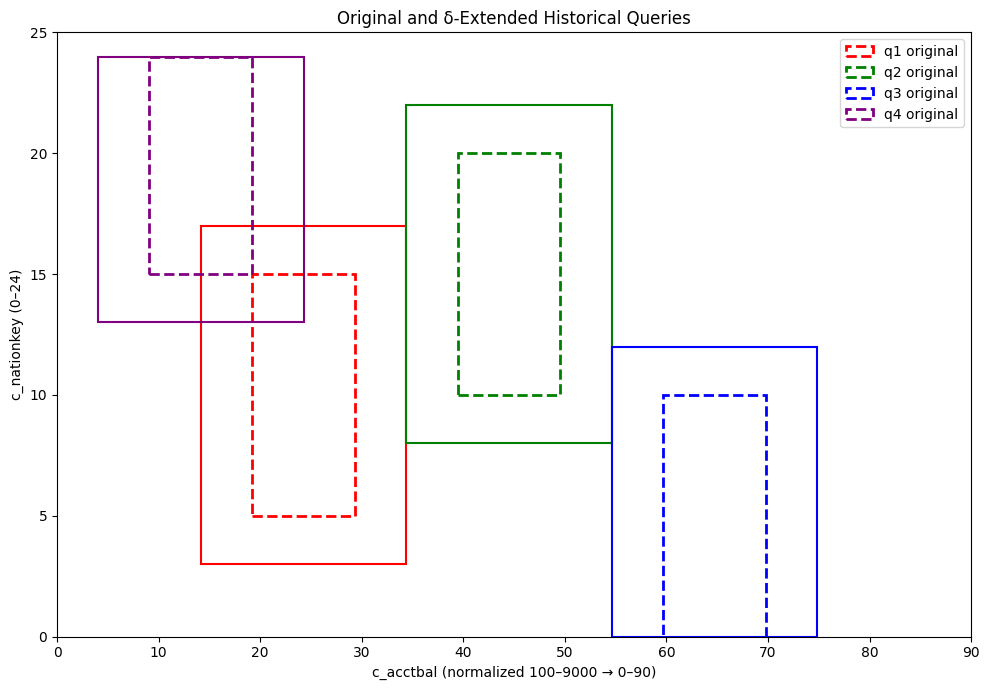

In [3]:
# Re-import required libraries after kernel reset
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define original and extended queries
QH = {
    "q1": (20, 60, 2000, 3000, 5, 15),
    "q2": (70, 120, 4000, 5000, 10, 20),
    "q3": (100, 150, 6000, 7000, 0, 10),
    "q4": (130, 180, 1000, 2000, 15, 24)
}

# Extension threshold
delta = (10, 500, 2)

# Extend each query
def extend_query(bounds, delta):
    c_l, c_u, a_l, a_u, n_l, n_u = bounds
    dc, da, dn = delta
    return (
        max(0, c_l - dc),
        c_u + dc,
        max(100, a_l - da),
        a_u + da,
        max(0, n_l - dn),
        min(24, n_u + dn)
    )

QH_extended = {qid: extend_query(bounds, delta) for qid, bounds in QH.items()}

# Normalize acctbal to [0, 90] (based on range 100-9000)
def normalize_acctbal(val):
    return (val - 100) * 90 / (9000 - 100)

# Plot
fig, ax = plt.subplots(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i, (qid, orig) in enumerate(QH.items()):
    ext = QH_extended[qid]
    
    # Normalize acctbal
    x = normalize_acctbal(orig[2])
    w = normalize_acctbal(orig[3]) - x
    y = orig[4]
    h = orig[5] - y
    
    # Plot original query
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors[i], linestyle='--', facecolor='none', label=f"{qid} original")
    ax.add_patch(rect)
    
    # Extended query
    x_ext = normalize_acctbal(ext[2])
    w_ext = normalize_acctbal(ext[3]) - x_ext
    y_ext = ext[4]
    h_ext = ext[5] - y_ext
    rect_ext = patches.Rectangle((x_ext, y_ext), w_ext, h_ext, linewidth=1.5, edgecolor=colors[i], facecolor='none')
    ax.add_patch(rect_ext)

# Labels
ax.set_xlim(0, 90)
ax.set_ylim(0, 25)
ax.set_xlabel("c_acctbal (normalized 100–9000 → 0–90)")
ax.set_ylabel("c_nationkey (0–24)")
ax.set_title("Original and δ-Extended Historical Queries")
ax.legend()
plt.grid(False)
plt.tight_layout()

# # Save and show
# output_path = "/mnt/data/Extended_Queries_Visualization.png"
# plt.savefig(output_path)
plt.show()
